In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
        explained_variance_score, mean_squared_log_error, mean_tweedie_deviance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator

import lightgbm as lgbm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
GOOGLE_DRIVE_MOUNT = "/content/gdrive"
drive.mount(GOOGLE_DRIVE_MOUNT)

%cd /content/gdrive/My Drive/aibolit

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/aibolit


In [0]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_scores(y_test, y_pred):
    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('R2:  ', r2_score(y_test, y_pred))
    print('VAR: ', np.var(y_test))

In [0]:
COLUMNS_FEATURES =  [
  'var_middle_number', 'this_find_number',
  'string_concat_number', 'instance_of_number',
  'method_chain_number', 'var_decl_diff_number_11', 
  'var_decl_diff_number_7', 'var_decl_diff_number_5', 
  'super_method_call_number', 'force_type_cast_number',
  'entropy', 'halstead volume', 'ncss_method_avg',
  'left_spaces_var','right_spaces_var','max_left_diff_spaces',
  'max_right_diff_spaces'
]

ONLY_PATTERNS = [
                 'var_middle_number', 'this_find_number','string_concat_number', 
                 'instance_of_number',
                 'method_chain_number', 'var_decl_diff_number_11', 
                 'var_decl_diff_number_7', 'var_decl_diff_number_5', 
                 'super_method_call_number', 'force_type_cast_number']

FEATURES_NUMBER = len(ONLY_PATTERNS)
print("Number of featuers: ", FEATURES_NUMBER)

Number of featuers:  10


In [46]:
! pip install catboost
from catboost import CatBoostRegressor, CatBoost

# Ranking

In [0]:

class Singleton(type):
    _instances = {}  # type: ignore

    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            cls._instances[cls] = super(Singleton, cls).__call__(*args, **kwargs)
        return cls._instances[cls]


class Config(metaclass=Singleton):

    @staticmethod
    def home_aibolit_folder():
        return os.environ.get('HOME_AIBOLIT') or '/home/jovyan/aibolit'

    @staticmethod
    def folder_to_save_model_data():
        model_folder = Path(Config().home_aibolit_folder(), 'aibolit', 'binary_files')
        return os.environ.get('SAVE_MODEL_FOLDER') or model_folder

    @staticmethod
    def folder_model_data():
        dir_path = os.path.dirname(os.path.realpath(__file__))
        model_file = Path(Path(dir_path), 'binary_files', 'model.pkl')
        return os.environ.get('HOME_MODEL_FOLDER') or model_file

    @staticmethod
    def dataset_file():
        return 'dataset12.csv'

    @staticmethod
    def get_patterns_config():
        return {
            "patterns": [
                {"name": "Asserts", "code": "P1", "make": lambda: P1()},
                {"name": "Setters", "code": "P2", "make": lambda: P2()},
                {"name": "Empty Rethrow", "code": "P3", "make": lambda: P3()},
                {"name": "Prohibited class name", "code": "P4", "make": lambda: P4()},
                {"name": "Force Type Casting", "code": "P5", "make": lambda: P5()},
                {"name": "Count If Return", "code": "P6", "make": lambda: P6()},
                {"name": "Implements Multi", "code": "P7", "make": lambda: P7()},
                {"name": "Instance of", "code": "P8", "make": lambda: P8()},
                {"name": "Many primary constructors", "code": "P9", "make": lambda: P9()},
                {"name": "Method chain", "code": "P10", "make": lambda: P10()},
                {"name": "Multiple try", "code": "P11", "make": lambda: P11()},
                {"name": "Non final attribute", "code": "P12", "make": lambda: P12()},
                {"name": "Null check", "code": "P13", "make": lambda: P13()},
                {"name": "Partial synchronized", "code": "P14", "make": lambda: P14()},
                {"name": "Redundant catch", "code": "P15", "make": lambda: P15()},
                {"name": "Return null", "code": "P16", "make": lambda: P16()},
                {"name": "String concat", "code": "P17", "make": lambda: P17()},
                {"name": "Super Method", "code": "P18", "make": lambda: P18()},
                {"name": "This in constructor", "code": "P19", "make": lambda: P19()},
                {
                    "name": "Var declaration distance for 5 lines",
                    "code": "P20_5",
                    "make": lambda: P20(5)
                },
                {
                    "name": "Var declaration distance for 7 lines",
                    "code": "P20_7",
                    "make": lambda: P20(7)
                },
                {
                    "name": "Var declaration distance for 11 lines",
                    "code": "P20_11",
                    "make": lambda: P20(11)
                },
                {"name": "Var in the middle", "code": "P21", "make": lambda: P21()},
                {"name": "Array as function argument", "code": "P22", "make": lambda: P22()},
                {"name": "Joined validation", "code": "P23", "make": lambda: P23()},
                {"name": "Non final class", "code": "P24", "make": lambda: P24()},
                {"name": "Private static method", "code": "P25", "make": lambda: P25()},
                {"name": "Public static method", "code": "P26", "make": lambda: P26()},
                {"name": "Var siblings", "code": "P27", "make": lambda: P27()},
                {"name": "Null Assignment", "code": "P28", "make": lambda: P28()},
                {"name": "Multiple While", "code": "P29", "make": lambda: P29()},
                {"name": "Protected Method", "code": "P30", "make": lambda: P30()},
                {"name": "Send Null", "code": "P31", "make": lambda: P31()},
                {"name": "Nested Loop", "code": "P32", "make": lambda: P32()},
                # Dirty fix, TODO remove when the model will be retrained
                {"name": "Multiple While", "code": "P33", "make": lambda: P29()},
            ],
            "metrics": [
                {"name": "Entropy", "code": "M1", "make": lambda: M1()},
                {"name": "NCSS lightweight", "code": "M2", "make": lambda: M2()},
                {
                    "name": "Indentation counter: Right total variance",
                    "code": "M3_1",
                    "make": lambda: M3(right_var=True)
                },
                {
                    "name": "Indentation counter: Left total variance",
                    "code": "M3_2",
                    "make": lambda: M3(left_var=True)
                },
                {
                    "name": "Indentation counter: Right max variance",
                    "code": "M3_3",
                    "make": lambda: M3(max_right=True)
                },
                {
                    "name": "Indentation counter: Left max variance",
                    "code": "M3_4",
                    "make": lambda: M3(max_left=True)
                },
                {"name": "Cognitive Complexity", "code": "M4", "make": lambda: M4()},
                {"name": "LCOM4", "code": "M5", "make": lambda: M5()},
                {"name": "Max diameter of AST", "code": "M6", "make": lambda: M6()},
                {"name": "Number of variables", "code": "M7", "make": lambda: M7()}
            ],
            "target": {

            },
            "patterns_exclude": [
                "P27",  # empty implementation
            ],
            "metrics_exclude": []
        }

In [0]:
from typing import List

import numpy as np
import pandas as pd
from catboost import CatBoost
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler



class Dataset:
    def __init__(self, only_patterns: List[str]):
        self.input = None
        self.target = None
        self.do_rename_columns = False
        self.only_patterns = only_patterns

    def preprocess_file(
            self,
            scale_ncss=True,
            scale=False,
            **kwargs):

        print('reading dataset from {}'.format(Config.dataset_file()))
        df = pd.read_csv(Config.dataset_file())
        df = df[~df["filename"].str.lower().str.contains("test")]
        config = Config.get_patterns_config()
        if self.do_rename_columns:
            p_codes = \
                [x['code'] for x in config['patterns']] \
                + ['lines' + x['code'] for x in config['patterns']]
            m_codes = [x['code'] for x in config['metrics']]
            keys = p_codes + m_codes
            vals = \
                [x['name'] for x in config['patterns']] \
                + ['lines' + x['name'] for x in config['patterns']] \
                + [x['name'] for x in config['metrics']]

            replace_dict = dict(zip(keys, vals))
            df = df.rename(replace_dict)
            df.columns = vals
            print('Columns renamed:' + df.head())

        df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
        df = df[(df.ncss > 20) & (df.ncss < 100) & (df.npath_method_avg < 100000.00)].copy().reset_index()

        df.drop('filename', axis=1, inplace=True)
        df.drop('index', axis=1, inplace=True)
        self.target = np.array(df[['M4']].values[:, 0], dtype=np.float64)
        if scale_ncss:
            new = pd.DataFrame(
                df[self.only_patterns].values / df['M2'].values.reshape((-1, 1)),
                columns=self.only_patterns
            )
            self.target /= df['M2'].values.reshape(-1)
        else:
            new = df[self.only_patterns].copy()
        if scale:
            self.input = pd.DataFrame(StandardScaler().fit_transform(new.values), columns=new.columns,
                                      index=new.index).values
        else:
            self.input = new.values

        self.feature_order = list(new.columns)


class TwoFoldRankingModel(BaseEstimator):
    def __init__(self, pca_components=None):
        self.do_rename_columns = False
        self.model = None
        self.features_conf = None
        self.pca_components = pca_components
        self.pca = None

    def fit(self, X, y, display=False):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
            y: np.array with shape (number of snippets,), array of snippets'
                complexity metric values
            display: bool, to output info about training or not
        """


        if self.pca_components is not None:
            X = X.copy()
            self.pca = PCA(n_components=self.pca_components)
            X = self.pca.fit_transform(X)

        
        model = CatBoost()
        grid = {'learning_rate': [0.03, 0.1],
                'depth': [4, 6, 10],
                'l2_leaf_reg': [1, 3, 5, 7, 9]}
        model.grid_search(
            grid,
            X=X,
            y=y,
            verbose=display,
        )
        self.model = model
        self.model.fit(X, y.ravel(), logging_level='Silent')

    def __get_pairs(self, item, th: float):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        pattern_importances = item * self.model.feature_importances_
        # mask discards not significant patterns
        th_mask = (sigmoid(pattern_importances) <= th) + 0
        pattern_importances = pattern_importances * th_mask
        order = np.arange(self.model.feature_importances_.size)
        return (pattern_importances, order)

    def __vstack_arrays(self, res):
        return np.vstack(res).T

    def predict(self, X, return_acts=False, quantity_func='log', th=1.0):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
            quantity_func: str, type of function that will be applied to
                number of occurrences.
            th (float): Sensitivity of algorithm to recommend.
                0 - ignore all recomendations
                1 - use all recommendations
        Returns:
            ranked: np.array with shape (number of snippets, number of patterns)
                of sorted patterns in non-increasing order for each snippet of
                code.
        """

        if X.ndim == 1:
            X = X.copy()
            X = np.expand_dims(X, axis=0)

        ranked = []
        quantity_funcs = {
            'log': lambda x: np.log1p(x) / np.log(10),
            'exp': lambda x: np.exp(x + 1),
            'linear': lambda x: x,
        }

        for snippet in X:
            try:
                item = quantity_funcs[quantity_func](snippet)
                pairs = self.__vstack_arrays(self.__get_pairs(item, th))
                pairs = pairs[pairs[:, 0].argsort()]
                ranked.append(pairs[:, 1].T.tolist()[::-1])
            except Exception:
                raise Exception("Unknown func")

        if not return_acts:
            return (np.array(ranked), pairs[:, 0].T.tolist()[::-1])
        return np.array(ranked), pairs[:, 0].T.tolist()[::-1], np.zeros(X.shape[0]) - 1

    def get_array(self, X, mask, i, incr):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns).
            mask: np.array with shape (number of snippets, number of patterns).
            i: int, 0 <= i < number of patterns.
            add: bool.
        Returns:
            X1: modified np.array with shape (number of snippets, number of patterns).
        """

        X1 = X.copy()
        X1[:, i][mask[:, i]] += incr

        return X1

    def get_minimum(self, c1, c2, c3):
        """
        Args:
            c1, c2, c3: np.array with shape (number of snippets, ).
        Returns:
            c: np.array with shape (number of snippets, ) -
            elemental minimum of 3 arrays.
            number: np.array with shape (number of snippets, ) of
            arrays' numbers with minimum elements.            .
        """

        c = np.vstack((c1, c2, c3))

        return np.min(c, 0), np.argmin(c, 0)

    def informative(self, X, return_acts=False):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
        Returns:
            ranked: np.array with shape (number of snippets, number of patterns)
                of sorted patterns in non-increasing order for each snippet of
                code.
            acts: np.array with shape (number of snippets, ) of
            numbers of necessary actions for complexity's decrement.
            0 - do not modify the pattern, 1 - decrease by 1, 2 - increase by 1.
        """

        if X.ndim == 1:
            X = X.copy()
            X = np.expand_dims(X, axis=0)
        
        k = X.shape[1]
        complexity = self.model.predict(X)
        mask = X > 0
        importances = np.zeros(X.shape)
        actions = np.zeros(X.shape)
        for i in range(k):
            complexity_minus = self.model.predict(self.pca.transform(self.get_array(X, mask, i, -1)))
            complexity_plus = self.model.predict(self.pca.transform(self.get_array(X, mask, i, 1)))
            c, number = self.get_minimum(complexity, complexity_minus, complexity_plus)
            importances[:, i] = complexity - c
            actions[:, i] = number

        ranked = np.argsort(-1 * importances, 1)
        if not return_acts:
            return ranked, importances
        acts = actions[np.argsort(ranked, 1) == 0]
        return ranked, importances, acts

In [0]:
config = Config.get_patterns_config()
only_patterns = [
    x['code'] for x in list(config['patterns'])
    if x['code'] not in config['patterns_exclude']
][:-3]

In [0]:
DS = Dataset(only_patterns)
DS.preprocess_file()

reading dataset from dataset12.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [0]:
X_train, X_test, y_train, y_test = train_test_split(DS.input, DS.target, test_size=0.3, random_state=42)

In [0]:
%%time

TF = TwoFoldRankingModel()
TF.fit(X_train, y_train)


bestTest = 0.1411194987
bestIteration = 993


bestTest = 0.1398660903
bestIteration = 992


bestTest = 0.1412604285
bestIteration = 999


bestTest = 0.1400141157
bestIteration = 939


bestTest = 0.1414164835
bestIteration = 999


bestTest = 0.1398469357
bestIteration = 994


bestTest = 0.1417569877
bestIteration = 999


bestTest = 0.1401428985
bestIteration = 998


bestTest = 0.1418186641
bestIteration = 996


bestTest = 0.1400678936
bestIteration = 993


bestTest = 0.1393679238
bestIteration = 999


bestTest = 0.1388594128
bestIteration = 874


bestTest = 0.1396057239
bestIteration = 999


bestTest = 0.1384221721
bestIteration = 981


bestTest = 0.1397453705
bestIteration = 997


bestTest = 0.138553496
bestIteration = 998


bestTest = 0.1400672489
bestIteration = 999


bestTest = 0.1388205045
bestIteration = 996


bestTest = 0.1401500603
bestIteration = 999


bestTest = 0.1383719009
bestIteration = 988


bestTest = 0.1369500717
bestIteration = 998


bestTest = 0.1374581968
bestIterat

In [0]:
%%time

TF_pca = TwoFoldRankingModel(pca_components=10)
TF_pca.fit(X_train, y_train)


bestTest = 0.1482967043
bestIteration = 998


bestTest = 0.1472112609
bestIteration = 897


bestTest = 0.1482083061
bestIteration = 999


bestTest = 0.1468007286
bestIteration = 741


bestTest = 0.1481786117
bestIteration = 999


bestTest = 0.1470866525
bestIteration = 651


bestTest = 0.1482601364
bestIteration = 999


bestTest = 0.1469795317
bestIteration = 953


bestTest = 0.1482856306
bestIteration = 999


bestTest = 0.1471327052
bestIteration = 776


bestTest = 0.1466185082
bestIteration = 998


bestTest = 0.1463876415
bestIteration = 929


bestTest = 0.1466347656
bestIteration = 990


bestTest = 0.145989483
bestIteration = 870


bestTest = 0.1466388787
bestIteration = 999


bestTest = 0.1462128087
bestIteration = 610


bestTest = 0.1468989903
bestIteration = 994


bestTest = 0.1467153444
bestIteration = 623


bestTest = 0.1468203254
bestIteration = 987


bestTest = 0.1464604222
bestIteration = 554


bestTest = 0.1449700541
bestIteration = 928


bestTest = 0.1453189116
bestIterat

------------------------------------

In [0]:
y_pred = TF.informative(X_test)
y_pred_pca = TF_pca.informative(X_test)

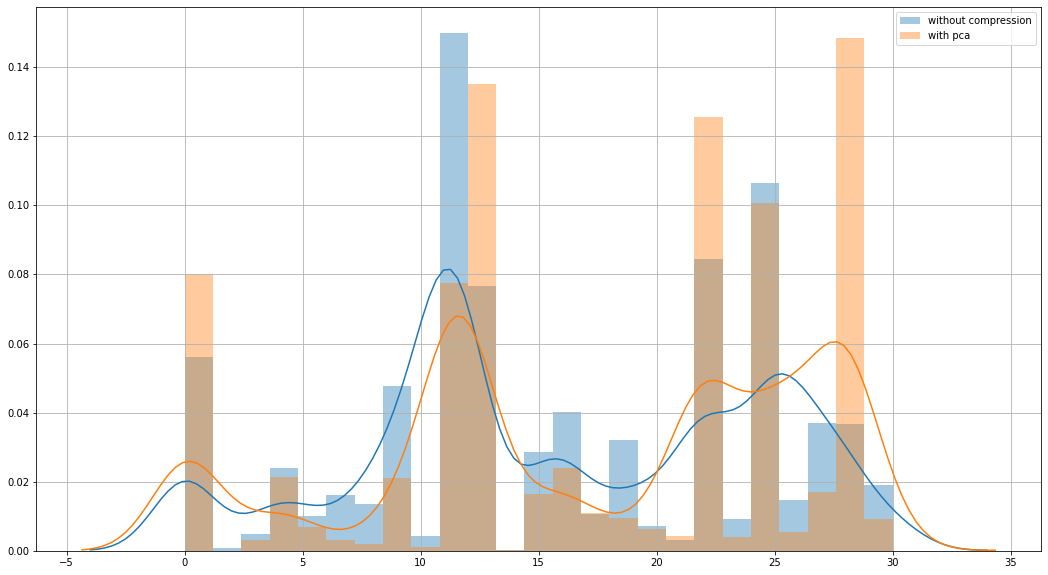

In [0]:
plt.figure(figsize=(18,10))

sns.distplot(y_pred[0][:,1], label='without compression')
sns.distplot(y_pred_pca[0][:,1], label='with pca')

plt.legend()
plt.grid(True)
plt.show()

In [0]:
TF_pca.pca.explained_variance_ratio_

array([0.27534492, 0.16630668, 0.08855856, 0.07940894, 0.06663356,
       0.06015316, 0.05201745, 0.04469734, 0.02858568, 0.02557525])

In [7]:
from scipy.stats import pearsonr

np.random.normal(mu, sigma, A.shape[1])

pearsonr(a, b)

(-0.16338781052020734, 0.8366121894797927)

In [17]:
import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


num_samples = 400

r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])

x = norm.rvs(size=(3, num_samples))
c = cholesky(r, lower=True)

y = np.dot(c, x)

(-0.9711905777103648, 5.160901582242309e-250)

In [0]:
import random

random_zeros_idxs1 = random.sample(range(num_samples), num_samples * 9 // 10)
random_zeros_idxs2 = random.sample(range(num_samples), num_samples // 2)

In [44]:
a1 = x[0].copy()
a1[random_zeros_idxs1] = 0

a2 = x[1].copy()
a2[random_zeros_idxs2] = 0

b = y[0].copy()

print(pearsonr(a1, b))
print(pearsonr(a2, b))

(0.3310292423760147, 1.1035576820051802e-11)
(0.04704328928381804, 0.34801782603069725)


In [0]:
A = np.vstack((a1, a2)).T

model = CatBoost()
model.fit(A, b, logging_level='Silent')

In [48]:
model.feature_importances_

array([18.22857382, 81.77142618])